# Analysis of research
## A presentation on different approaches to clustering NFTRank data

This notebook will cover various topics including clustering algorithms and dimension reduction techniques via Python. The goal of this research is to mix different approaches of dimension reduction techniques with clustering algorithms (PCA with K-Means, or UMAP with DBSCAN) to prove that clustering NFTRank data is possible for SwapEase. Finding/creating a successful approach will give SwapEase a critical edge in the market. Such a process does not exist in the NFT space, and can be a powerful tool in a seasoned trader's hands. The summation of this research will help create descriptive enough data that will provide key insights for NFT arbitrage. 

I believe that clustering NFTs within a specific collection can help us achieve this. We can extract key information from "like NFTs" with efficient performance at scale. Information included could be anything from averages of trades to performance of clusters in the current market. This would be guided by the cluster since it reduces the scope of information to conglomerate.

In [22]:
import pandas
from sklearn.preprocessing import StandardScaler

# The data file path used in this document
KOIN_path = "./data/KOIN.csv"
BAYC_path = "./data/BAYC.csv"
DOODLES_path = "./data/DOODLES.csv"
MEKA_path = "./data/MEKA.csv"

constants = [
    {
        'path': KOIN_path,
        'name': "KOIN"
    },
    {
        'path': BAYC_path,
        'name': "BAYC"
    },
    {
        'path': DOODLES_path,
        'name': "DOODLES"
    },
    {
        'path': MEKA_path,
        'name': "MEKA"
    },
]

# Function to retrieve and set data in a data frame
def retrieve_data_from_csv(path):
    df = pandas.read_csv(path, index_col='token_id')
    return df

# Retrieve all data from constants
def retrieve_data():
    data_frames = []

    for constant in constants:
        data_frames.append(retrieve_data_from_csv(constant['path']))

    return data_frames

# Scale data using StandardScaler
def scale_data():
    scaled_data_frames = []

    for df in NFT_dfs:
        scaled_data_frames.append(StandardScaler().fit_transform(df))

    return scaled_data_frames

NFT_dfs = retrieve_data()
scaled_dfs = scale_data()

In [23]:
# Some functions necessary to analyze the clusters

# Creates an object containing information about the cluster
def get_clusters_dict(labels, data_frame):
    clusters_dict = {}

    for index, token_id in enumerate(data_frame.index):
        # Grab the lable from the clusters array
        label = labels[index]
        token_information = {
            "token_id": token_id, 
            "rank": index + 1, 
            "token_information": data_frame.iloc[index].values
        }

        # Check if label is in dictionary
        if label in clusters_dict.keys():
            clusters_dict[label].append(token_information)
        else:
            clusters_dict[label] = [token_information]

    return clusters_dict

# Generates Avgs based on Rank and Score, as well as top five ranked NFTs for a cluster
def analyze_clusters(clusters_dict):
    analysis = []
    rank_avg = []
    rank_sum_avg = []
    cluster_keys = clusters_dict.keys()

    for cluster_num in cluster_keys:
        rank_sum = 0
        rank_score_sum = 0
        token_ids = []
        ranks = []

        # Generate rank_sum, rank_score_sum, and gather token_ids
        for token in clusters_dict[cluster_num]:
            rank_sum += token['rank']
            rank_score_sum += sum(token['token_information'])
            token_ids.append(token['token_id'])
            ranks.append(token['rank'])
        
        # top_five = sorted(zip(ranks, token_ids), key=lambda t: t[0])[:5]
        top_five = sorted(zip(ranks, token_ids), key=lambda t: t[0])

        # Add top_five tokens in a cluster and cluster number to analysis array
        analysis.append({
            "cluster_#": cluster_num + 1,
            "top_five": top_five
        })
        rank_avg.append(rank_sum/len(clusters_dict[cluster_num]))
        rank_sum_avg.append(rank_score_sum/len(clusters_dict[cluster_num]))

    # Load avgs into pandas df
    avg_df = pandas.DataFrame({"Rank Avg": rank_avg, "Rank Sum Avg": rank_sum_avg}, columns = ['Rank Avg', 'Rank Sum Avg'])

    return {"analysis": analysis, "avg_df": avg_df}

# Creates analysis for all data sets
def get_analysis(clusters):
    cluster_dicts = []

    for i in range(len(NFT_dfs)):
        cluster_dicts.append(get_clusters_dict(clusters[i], NFT_dfs[i]))
    
    analysis = []

    for cluster_dict in cluster_dicts:
        analysis.append(analyze_clusters(cluster_dict))

    return analysis

### T-SNE Analysis

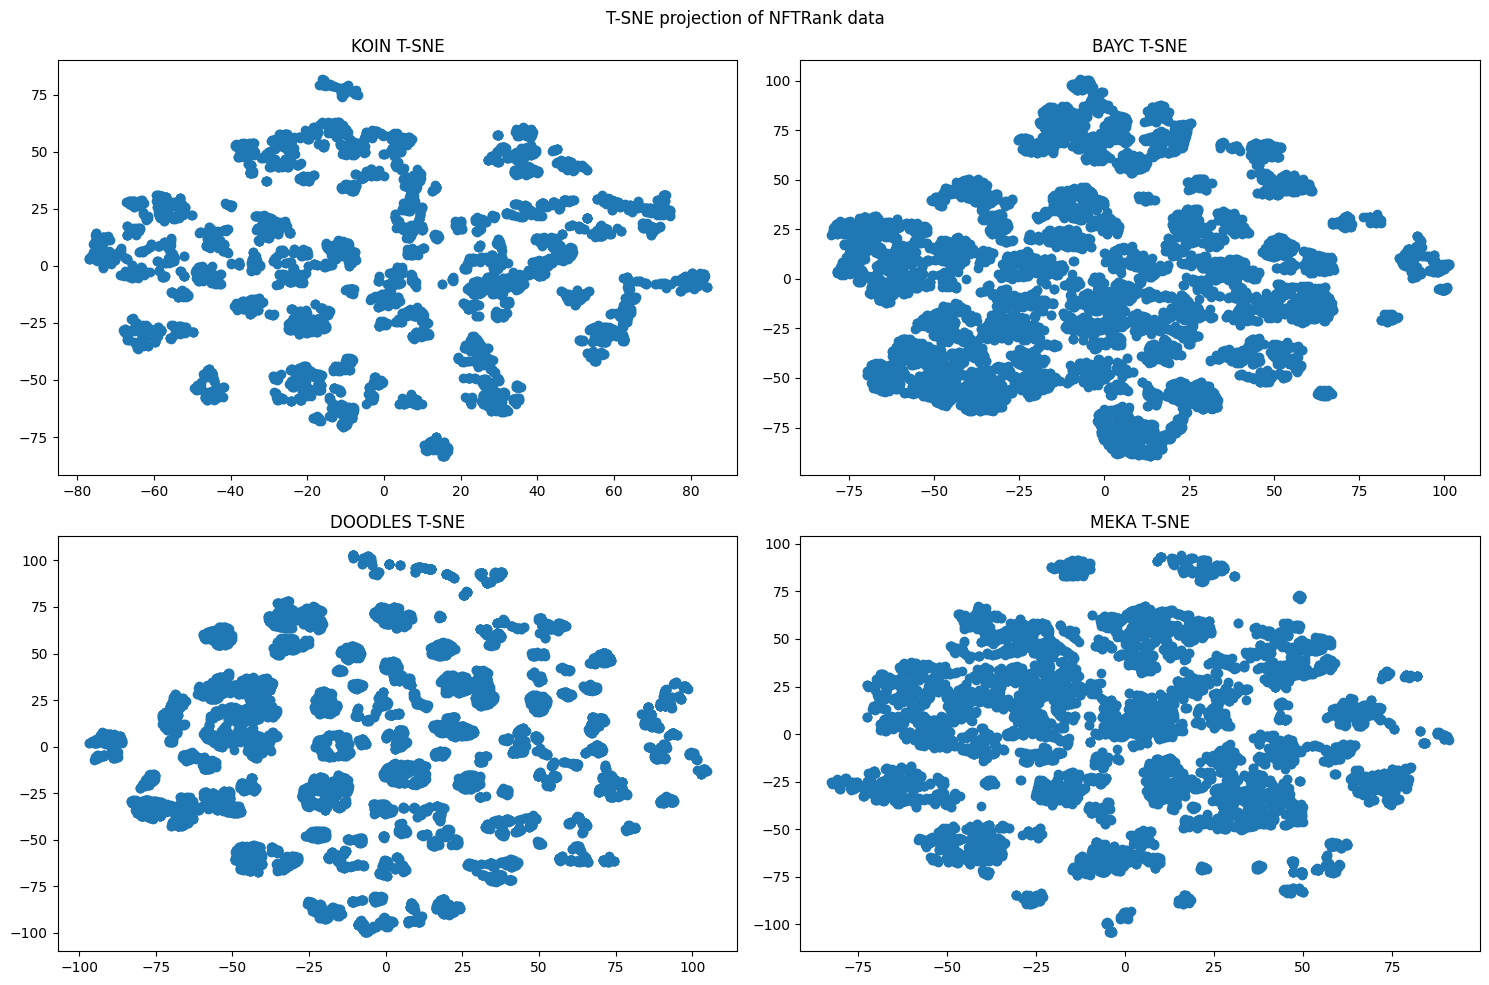

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def create_embeddings():
    embeddings = []

    for scaled_df in scaled_dfs:
        # Create a t-SNE model with 2 components
        tsne = TSNE(n_components=2)
        embeddings.append(tsne.fit_transform(scaled_df))

    return embeddings

def generate_TSNE_plots(embeddings):
    fig, axs = plt.subplots(2,2, figsize=(15,10))
    
    fig.suptitle("T-SNE projection of NFTRank data")

    x = 0
    y = 0

    for i in range(0, 4):
        axs[x,y].set_title("{} T-SNE".format(constants[i]['name']))
        axs[x,y].scatter(embeddings[i][:, 0], embeddings[i][:, 1])

        if (i + 1) % 2 == 0:
            x += 1
            y = 0
        else:
            y += 1

    fig.tight_layout()
    plt.show()

# Create UMAP embeddings to see associated graphs
TSNE_embeddings = create_embeddings()

# Generate the graph for all data sets
generate_TSNE_plots(embeddings=TSNE_embeddings)

In [25]:
# Displays clustered data from UMAP via clustering methods AND displays analysis plots to see where clusters scale
def generate_TSNE_cluster_plots_and_analyze(embeddings, clusters, analysis, cluster_method_title):
    fig, axs = plt.subplots(4,2, figsize=(15,20))
    
    fig.suptitle("T-SNE projection of NFTRank data {}".format(cluster_method_title))

    axs[0,0].set_title("{} Clusters".format(constants[0]['name']))
    axs[0,0].scatter(embeddings[0][:, 0], embeddings[0][:, 1], c=clusters[0])

    axs[0,1].set_title("{} Clusters".format(constants[1]['name']))
    axs[0,1].scatter(embeddings[1][:, 0], embeddings[1][:, 1], c=clusters[1])

    axs[1,0].set_title("{} Clusters".format(constants[2]['name']))
    axs[1,0].scatter(embeddings[2][:, 0], embeddings[2][:, 1], c=clusters[2])

    axs[1,1].set_title("{} Clusters".format(constants[3]['name']))
    axs[1,1].scatter(embeddings[3][:, 0], embeddings[3][:, 1], c=clusters[3])

    axs[2,0].set_title("{} analysis ({} points)".format(constants[0]['name'],len(analysis[0]['avg_df'])))
    axs[2,0].scatter(x=analysis[0]['avg_df']['Rank Avg'], y=analysis[0]['avg_df']['Rank Sum Avg'])

    axs[2,1].set_title("{} analysis ({} points)".format(constants[1]['name'],len(analysis[1]['avg_df'])))
    axs[2,1].scatter(x=analysis[1]['avg_df']['Rank Avg'], y=analysis[1]['avg_df']['Rank Sum Avg'])

    axs[3,0].set_title("{} analysis ({} points)".format(constants[2]['name'],len(analysis[2]['avg_df'])))
    axs[3,0].scatter(x=analysis[2]['avg_df']['Rank Avg'], y=analysis[2]['avg_df']['Rank Sum Avg'])

    axs[3,1].set_title("{} analysis ({} points)".format(constants[3]['name'],len(analysis[3]['avg_df'])))
    axs[3,1].scatter(x=analysis[3]['avg_df']['Rank Avg'], y=analysis[3]['avg_df']['Rank Sum Avg'])
    
    fig.tight_layout()
    plt.show()

### Clustering with DBSCAN

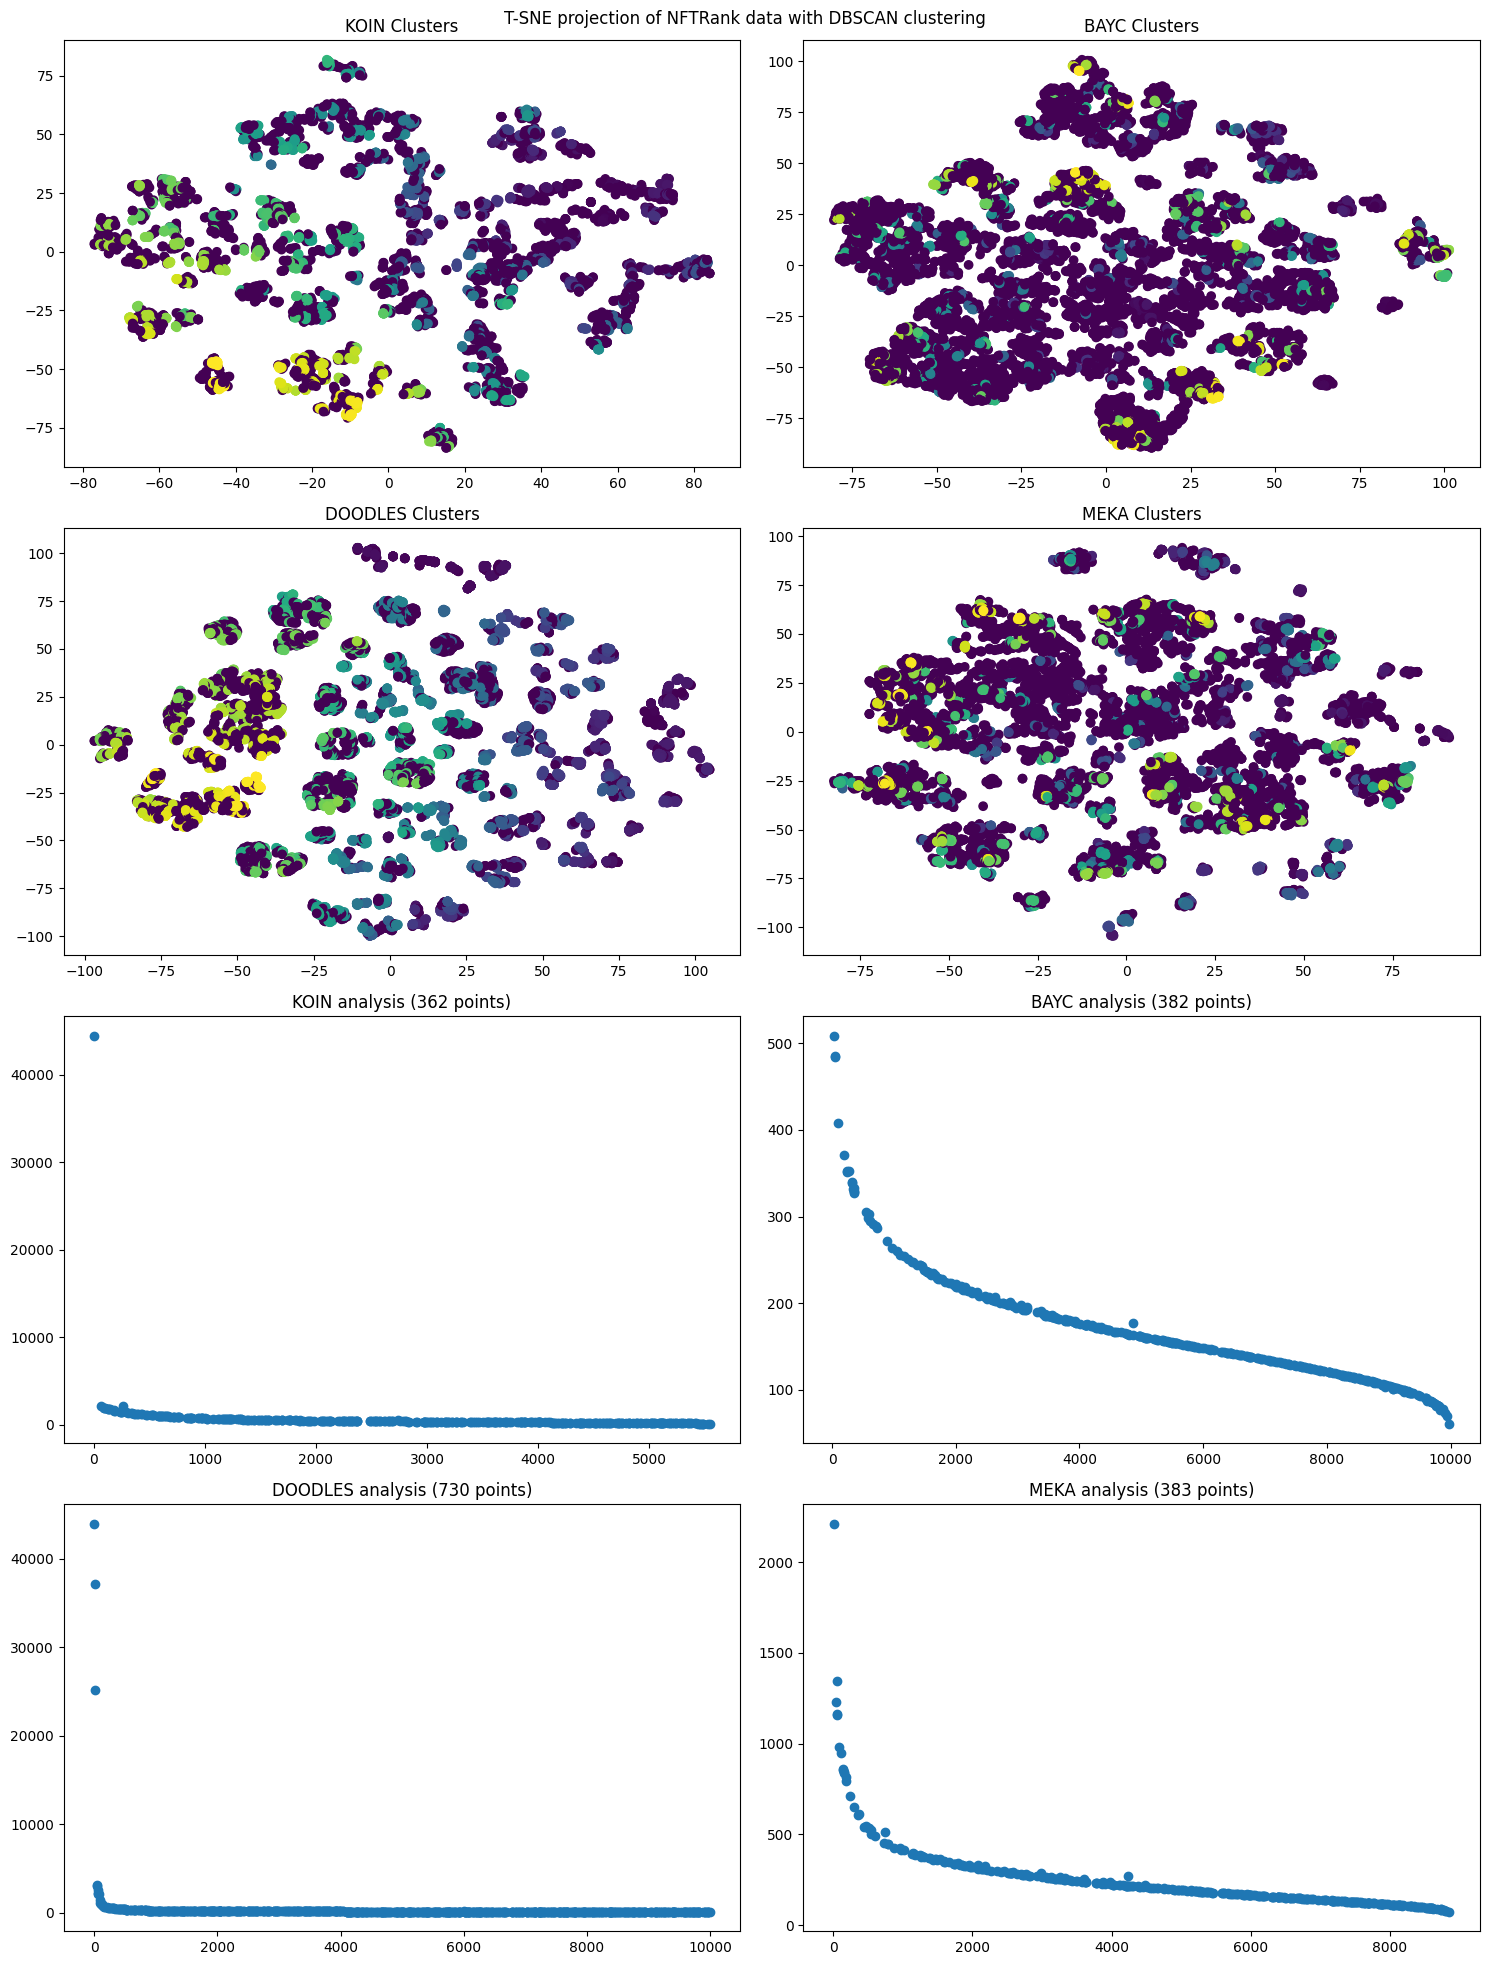

In [26]:
from sklearn.cluster import DBSCAN

def get_DBSCAN_clusters(embeddings):
    clusters = []

    for embedding in embeddings:
        clusterer_DBSCAN = DBSCAN(eps=.5)
        clusters.append(clusterer_DBSCAN.fit_predict(embedding))

    return clusters

TSNE_DBSCAN_clusters = get_DBSCAN_clusters(TSNE_embeddings)
TSNE_DBSCAN_analysis = get_analysis(TSNE_DBSCAN_clusters)

generate_TSNE_cluster_plots_and_analyze(TSNE_embeddings, TSNE_DBSCAN_clusters, TSNE_DBSCAN_analysis, "with DBSCAN clustering")

### Clustering with KMeans

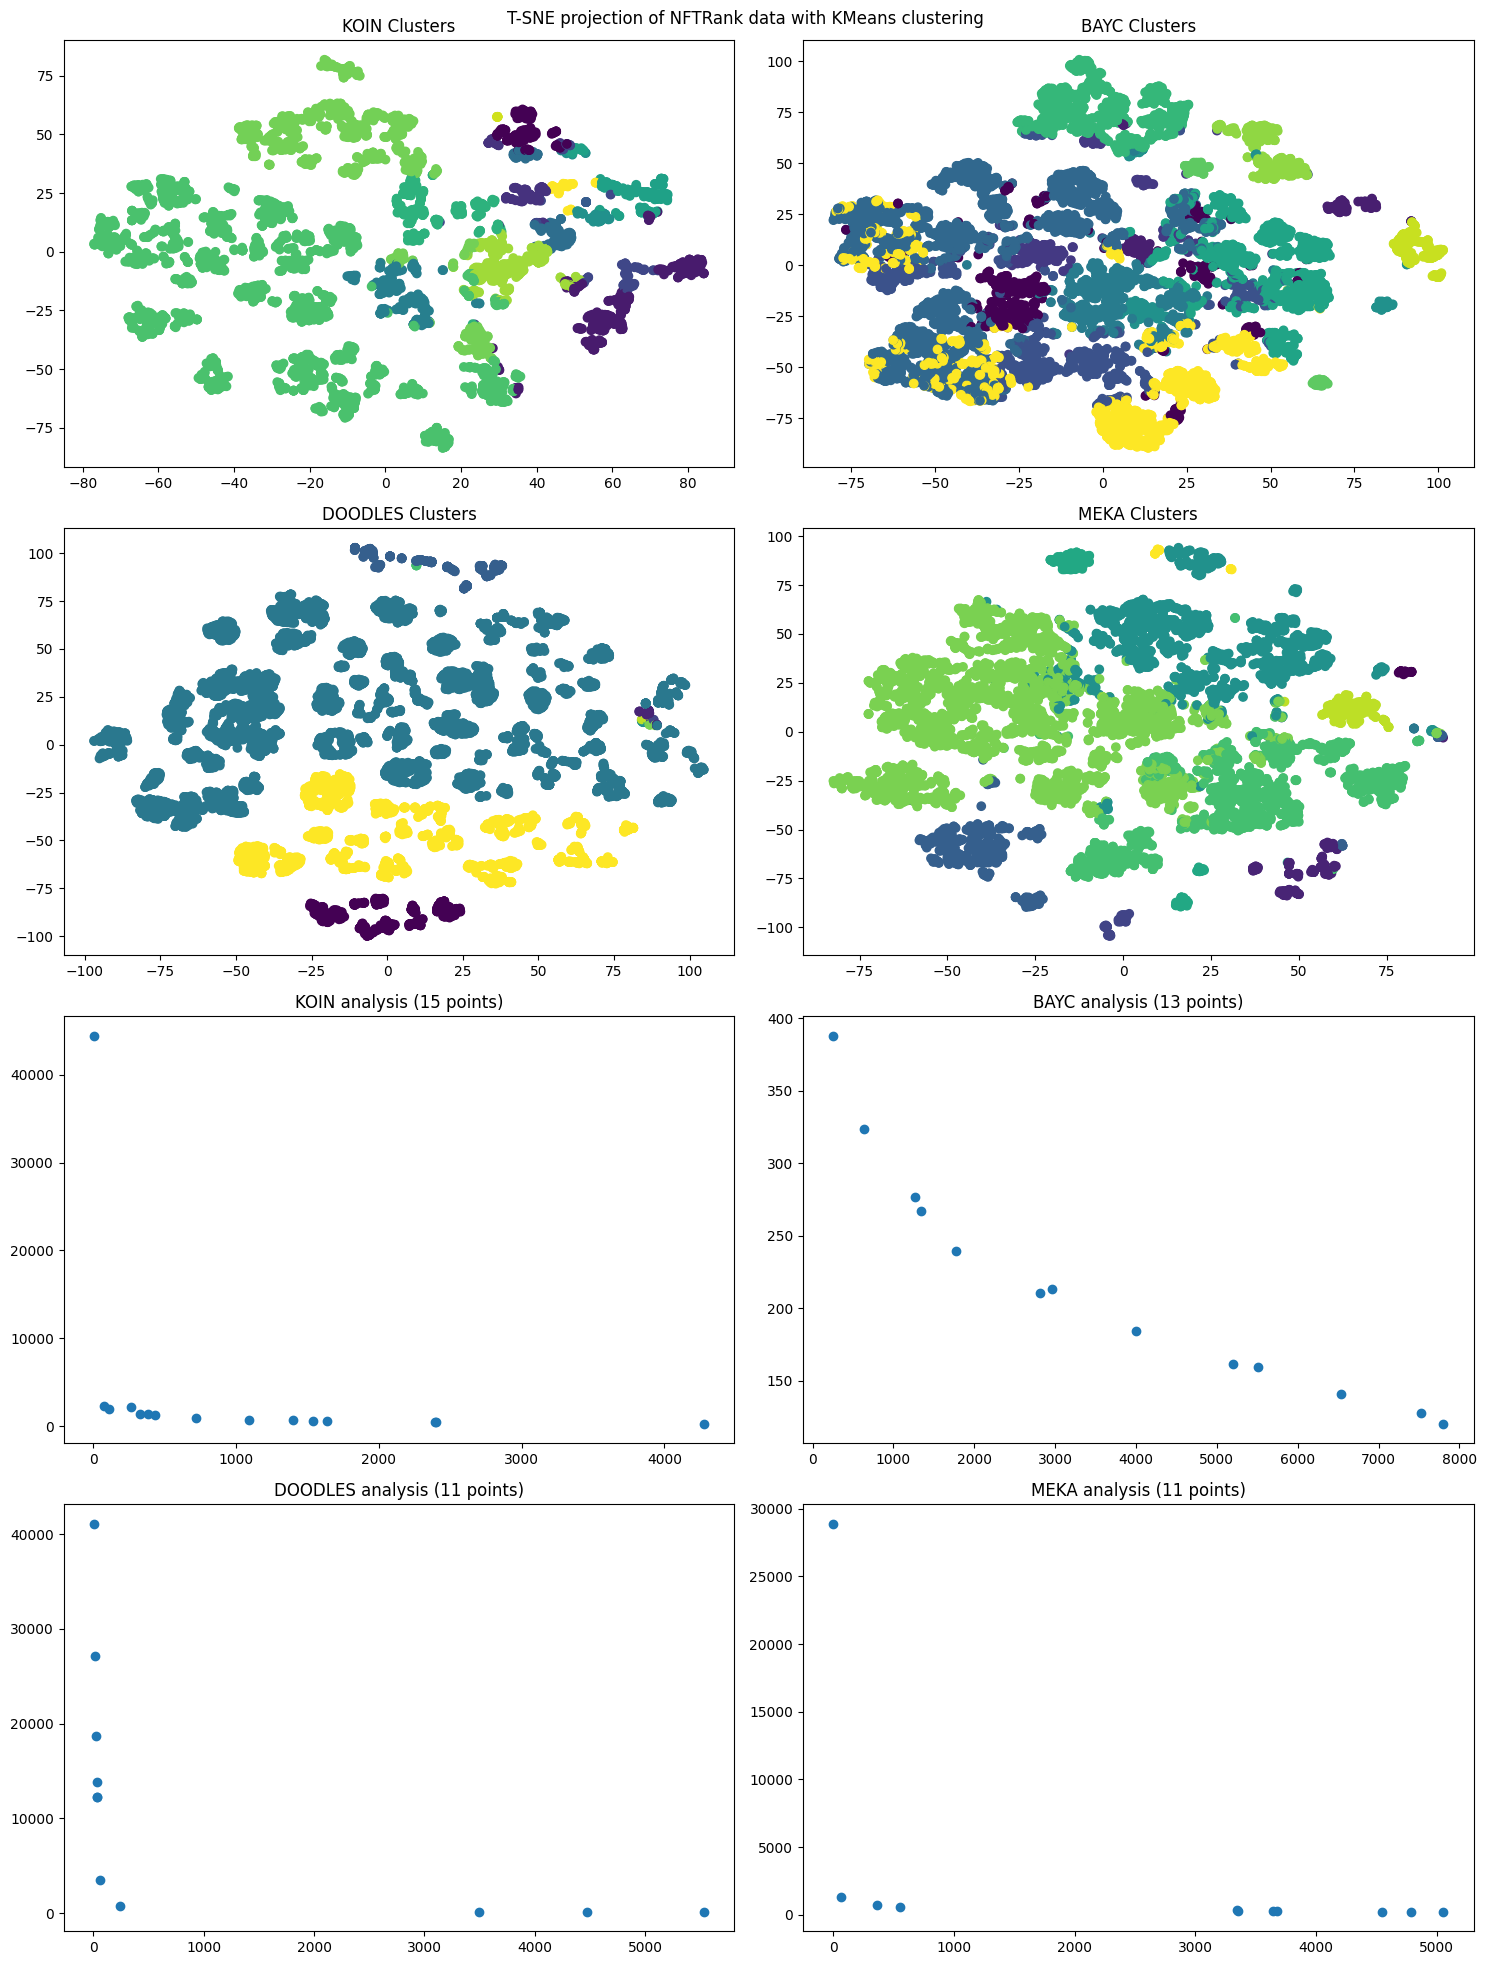

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 500,
}

def get_KMeans_labels_via_silhouette(embeddings):
    kmeans_labels = []

    for embedding in embeddings:
        best_score = -1
        labels = 0

        for k in range(10, 20):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(embedding)
            score = silhouette_score(embedding, kmeans.labels_)

            if score > best_score:
                best_score = score
                labels = kmeans.labels_

        kmeans_labels.append(labels)

    return kmeans_labels

KMean_clusters = get_KMeans_labels_via_silhouette(TSNE_embeddings)
UMAP_KMean_analysis = get_analysis(KMean_clusters)

generate_TSNE_cluster_plots_and_analyze(TSNE_embeddings, KMean_clusters, UMAP_KMean_analysis, "with KMeans clustering")

In [35]:
def print_clusters(analysis):
    for i in range(0, len(analysis)):
        print("Cluster {}".format(analysis[i]['cluster_#']))
        for t in analysis[i]['top_five']:
            print("\t Rank: {}\t TokenId: {}".format(t[0], t[1]))

print_clusters(TSNE_DBSCAN_analysis[3]['analysis'])

Cluster 0
	 Rank: 1	 TokenId: 8597
	 Rank: 2	 TokenId: 6273
	 Rank: 3	 TokenId: 6242
	 Rank: 4	 TokenId: 1922
	 Rank: 10	 TokenId: 396
	 Rank: 14	 TokenId: 945
	 Rank: 15	 TokenId: 848
	 Rank: 16	 TokenId: 1564
	 Rank: 18	 TokenId: 2742
	 Rank: 21	 TokenId: 6599
	 Rank: 26	 TokenId: 7313
	 Rank: 27	 TokenId: 7616
	 Rank: 28	 TokenId: 1633
	 Rank: 36	 TokenId: 2194
	 Rank: 37	 TokenId: 3995
	 Rank: 41	 TokenId: 1559
	 Rank: 49	 TokenId: 6758
	 Rank: 51	 TokenId: 8378
	 Rank: 60	 TokenId: 4249
	 Rank: 63	 TokenId: 7450
	 Rank: 64	 TokenId: 366
	 Rank: 65	 TokenId: 4971
	 Rank: 67	 TokenId: 2230
	 Rank: 71	 TokenId: 7180
	 Rank: 72	 TokenId: 5465
	 Rank: 73	 TokenId: 2593
	 Rank: 74	 TokenId: 1940
	 Rank: 78	 TokenId: 591
	 Rank: 81	 TokenId: 1320
	 Rank: 90	 TokenId: 2313
	 Rank: 92	 TokenId: 3649
	 Rank: 93	 TokenId: 867
	 Rank: 94	 TokenId: 8249
	 Rank: 95	 TokenId: 4813
	 Rank: 96	 TokenId: 118
	 Rank: 97	 TokenId: 3377
	 Rank: 98	 TokenId: 2781
	 Rank: 99	 TokenId: 3578
	 Rank: 105	 

In [37]:
print_clusters(UMAP_KMean_analysis[0]['analysis'])

Cluster 5
	 Rank: 1	 TokenId: 5532
	 Rank: 2	 TokenId: 4901
	 Rank: 3	 TokenId: 3983
	 Rank: 4	 TokenId: 3815
	 Rank: 5	 TokenId: 3073
	 Rank: 6	 TokenId: 2746
	 Rank: 7	 TokenId: 2686
	 Rank: 8	 TokenId: 1559
	 Rank: 9	 TokenId: 809
	 Rank: 10	 TokenId: 59
Cluster 14
	 Rank: 11	 TokenId: 3397
	 Rank: 97	 TokenId: 2876
	 Rank: 241	 TokenId: 1079
	 Rank: 268	 TokenId: 3881
	 Rank: 382	 TokenId: 1772
	 Rank: 395	 TokenId: 5273
	 Rank: 442	 TokenId: 4158
Cluster 15
	 Rank: 12	 TokenId: 2986
	 Rank: 13	 TokenId: 4159
	 Rank: 14	 TokenId: 3824
	 Rank: 16	 TokenId: 2145
	 Rank: 18	 TokenId: 455
	 Rank: 19	 TokenId: 3241
	 Rank: 23	 TokenId: 878
	 Rank: 24	 TokenId: 1931
	 Rank: 27	 TokenId: 4747
	 Rank: 28	 TokenId: 5224
	 Rank: 31	 TokenId: 221
	 Rank: 33	 TokenId: 1206
	 Rank: 37	 TokenId: 2715
	 Rank: 40	 TokenId: 3990
	 Rank: 46	 TokenId: 5210
	 Rank: 47	 TokenId: 1249
	 Rank: 48	 TokenId: 284
	 Rank: 51	 TokenId: 1316
	 Rank: 53	 TokenId: 1211
	 Rank: 57	 TokenId: 66
	 Rank: 58	 TokenId